<a href="https://colab.research.google.com/github/Ishank2301/Pratise-ML-Algorithums/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selection of Best Regression model:

# Step-1 Importing the libraries

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
!pip install ucimlrepo
import numpy  as np

# Step-2 Importing the dataset




In [67]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
df = fetch_ucirepo(id=15)

# data (as pandas dataframes)
x = df.data.features
y = df.data.targets

# Handle missing values in x (specifically 'Bare_nuclei')
x = x.fillna(x.mean())

# metadata
print(df.metadata)

# variable information
print(df.variables)


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [68]:
print(x)

     Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
694                3                        1                         1   
695                2                        1                         1   
696                5                       10                        10   
697                4                        8                         6   
698                4                        8                         8   

     Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
0                    1         

# Splitting the data into Training and Test set:

In [73]:
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Training the LogisticRegression Model on Training Set:

In [70]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42)
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Creating A confusion Matrix:

[[94  1]
 [ 5 40]]
Our Accuracy score is: 0.9571428571428572


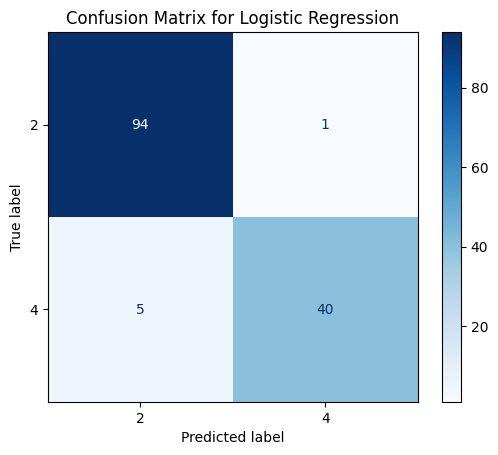

Classification Report:
              precision    recall  f1-score   support

           2       0.95      0.99      0.97        95
           4       0.98      0.89      0.93        45

    accuracy                           0.96       140
   macro avg       0.96      0.94      0.95       140
weighted avg       0.96      0.96      0.96       140



In [71]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
import numpy as np
cf = confusion_matrix(y_test,y_pred)
print(cf)
print(f"Our Accuracy score is:",accuracy_score(y_test, y_pred))

# Step 6: Visualize the Confusion Matrix
# Using ConfusionMatrixDisplay is a convenient way to plot the matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Optional: Print classification report for more detailed metrics (precision, recall, etc.)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=[str(x) for x in np.unique(y_test)]))

# Computing the accuracy with K-fold Cross Validation:

In [75]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(estimator = LR, X = x_train, y= y_train,cv=10)
print("Accuracy: {:.2f} %".format(acc.mean()*100))
print("Standard Deviation: {:.2f} %".format(acc.std()*100))

Accuracy: 96.42 %
Standard Deviation: 1.97 %


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam